## Volcanoes around the world 2021

This note book aims to analyse and visulize different aspects of volcanoes around the world. The dataset orgins from Kaggle and covers all volcanoes around the world categorized by their region.

This notebook will look at: 
- Number of Volcanoes per type
- Number of Volcanoes per region 
- Number of eruptions based on last known eruption category
- Distribution of Elevation 
- Visulizing volcanoes on a map

### Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Colburn_Hassman\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Colburn_Hassman\Anaconda3\lib\site-packa

In [2]:
#Looking at the columns
cols = list(pd.read_csv('volcanoes around the world in 2021.csv', nrows=1))
print(cols)

['Region', 'Number', 'Volcano Name', 'Country', 'Location', 'Latitude', 'Longitude', 'Elevation (m)', 'Type', 'Status', 'Last Known Eruption']


In [3]:
df = pd.read_csv('volcanoes around the world in 2021.csv')
df.head(10)

,Region,Number,Volcano Name,Country,Location,Latitude,Longitude,Elevation (m),Type,Status,Last Known Eruption
0,West Indies,1600-21-,Piparo,Trinidad,Trinidad,10.000,-61.000,140.0,Mud volcano,Historical,D1
1,West Indies,1600-08=,"Diables, Morne aux",Dominica,W Indies,15.612,-61.430,861.0,Stratovolcano,Fumarolic,U
2,West Indies,1600-09=,"Diablotins, Morne",Dominica,W Indies,15.503,-61.397,1430.0,Stratovolcano,Holocene,U
3,West Indies,1600-11=,"Plat Pays, Morne",Dominica,W Indies,15.255,-61.341,940.0,Stratovolcano,Radiocarbon,D5
4,West Indies,1600-10=,"Trois Pitons, Morne",Dominica,W Indies,15.370,-61.330,1387.0,Lava dome,Historical,D3
5,West Indies,1600-101,"Watt, Morne",Dominica,W Indies,15.307,-61.305,1224.0,Stratovolcanoes,Historical,D2
6,West Indies,1600-17=,St. Catherine,Grenada,W Indies,12.150,-61.670,840.0,Stratovolcano,Holocene,U
7,West Indies,1600-06=,Soufriere Guadeloupe,Guadeloupe,W Indies,16.044,-61.664,1467.0,Stratovolcano,Historical,D1
8,West Indies,1600-12=,Pelee,Martinique,W Indies,14.809,-61.165,1394.0,Stratovolcano,Historical,D2
9,West Indies,1600-05=,Soufriere Hills,Montserrat,W Indies,16.720,-62.180,915.0,Stratovolcano,Historical,D1


##### Last known eruption:
- ? = Uncertain Holocene eruption
- D1 = Last known eruption 1964 or later
- D2 = Last known eruption 1900-1963
- D3 = Last known eruption 1800-1899
- D4 = Last known eruption 1700-1799
- D5 = Last known eruption 1500-1699
- D6 = Last known eruption A.D. 1-1499
- D7 = Last known eruption B.C. (Holocene)
- Q = Quaternary eruption(s) with the only known Holocene activity being hydrothermal
- U = Undated, but probable Holocene eruption

In [4]:
df.dtypes

Region                  object
Number                  object
Volcano Name            object
Country                 object
Location                object
Latitude               float64
Longitude              float64
Elevation (m)          float64
Type                    object
Status                  object
Last Known Eruption     object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               1571 non-null   object 
 1   Number               1571 non-null   object 
 2   Volcano Name         1571 non-null   object 
 3   Country              1571 non-null   object 
 4   Location             1571 non-null   object 
 5   Latitude             1571 non-null   float64
 6   Longitude            1571 non-null   float64
 7   Elevation (m)        1566 non-null   float64
 8   Type                 1571 non-null   object 
 9   Status               1571 non-null   object 
 10  Last Known Eruption  1571 non-null   object 
dtypes: float64(3), object(8)
memory usage: 135.1+ KB


In [6]:
df['Type'].unique()

array(['Mud volcano', 'Stratovolcano', 'Lava dome', 'Stratovolcanoes',
       'Submarine volcano', 'Caldera', 'Fumarole field', 'Shield volcano',
       'Cinder cone', 'Explosion crater', 'Tuff cone', 'Volcanic field',
       'Complex volcano', 'Pyroclastic cone', 'Pumice cone',
       'Scoria cones', 'Pyroclastic cones', 'Scoria cone', 'Fissure vent',
       'Maar', 'Cinder cones', 'Fissure vents', 'Unknown', 'Tuff rings',
       'Subglacial volcano', 'Submarine volcano?', 'Crater rows',
       'Submarine volcanoes', 'Compound volcano', 'Shield volcanoes',
       'Cone', 'Lava cone', 'Lava domes', 'Maars', 'Pyroclastic shield',
       'Not Volcanic', 'Somma volcano', 'Volcanic complex',
       'Hydrothermal field'], dtype=object)

In [7]:
df['Status'].unique()

array(['Historical', 'Fumarolic', 'Holocene', 'Radiocarbon',
       'Anthropology', 'Tephrochronology', 'Ar/Ar', 'Holocene?',
       'Uncertain', 'Pleistocene', 'Hydrophonic', 'Lichenometry', 'K-Ar',
       'Ice Core', 'Magnetism', 'Dendrochronology', 'Pleistocene-Fumarol',
       'Varve Count', 'Uranium-series', 'Seismicity', 'Hot Springs',
       'Hydration Rind'], dtype=object)

### Number of volcanoes per type

In [18]:
df_type = df.groupby(['Type'], as_index=False, sort = True).count().drop(columns=['Volcano Name', 'Region', 'Country', 'Location', 'Latitude', 'Longitude',
                                                            'Elevation (m)', 'Status', 'Last Known Eruption'])

df_type = df_type.sort_values(by = 'Number', ascending=True).reset_index().drop(columns=['index'])
df_type

,Type,Number
0,Maars,1
1,Tuff rings,1
2,Not Volcanic,1
3,Mud volcano,1
4,Fissure vents,1
5,Shield volcanoes,2
6,Volcanic complex,2
7,Hydrothermal field,2
8,Scoria cones,3
9,Lava domes,3


In [28]:
df_rare = df_type.loc[0:33]
df_common = df_type.loc[34:38]

Text(0, 0.5, 'Name of volcano')

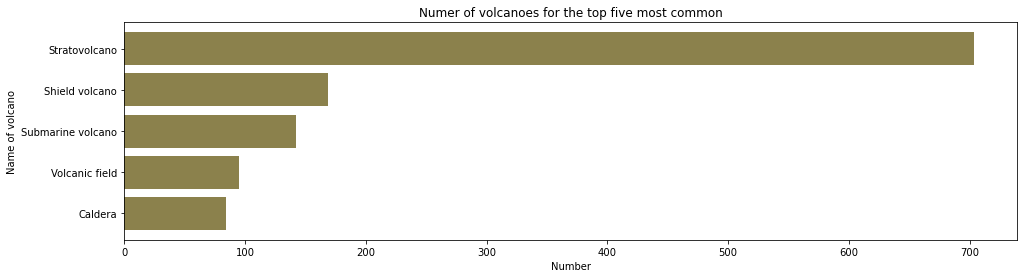

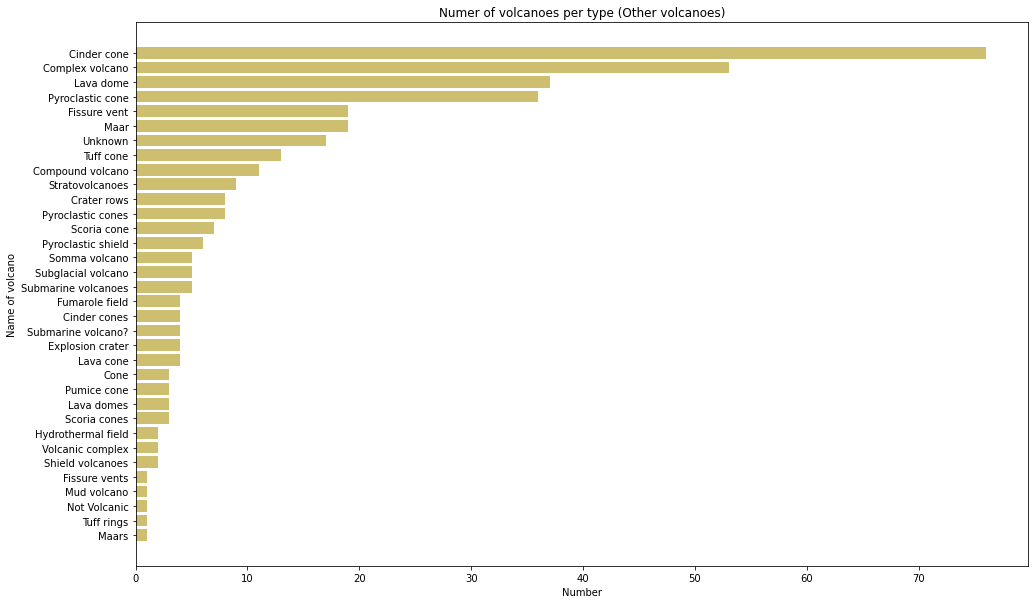

In [78]:
plt.figure(figsize=(16,4))
plt.title('Numer of volcanoes for the top five most common')
plt.barh(df_common['Type'], df_common['Number'], height=0.8, color = '#8B814C' )
plt.xlabel('Number')
plt.ylabel('Name of volcano')

plt.figure(figsize=(16,10))
plt.title('Numer of volcanoes per type (Other volcanoes)')
plt.barh(df_rare['Type'], df_rare['Number'], height=0.8, color = '#CDBE70' )
plt.xlabel('Number')
plt.ylabel('Name of volcano')

### Number of volcanoes per region

In [34]:
df_reg = df.groupby(['Region'], as_index=False, sort = True).count().drop(columns=['Volcano Name', 'Country', 'Location', 'Latitude', 'Longitude',
                                                            'Elevation (m)', 'Type', 'Status', 'Last Known Eruption'])
df_reg = df_reg.sort_values(by='Number', ascending=1)

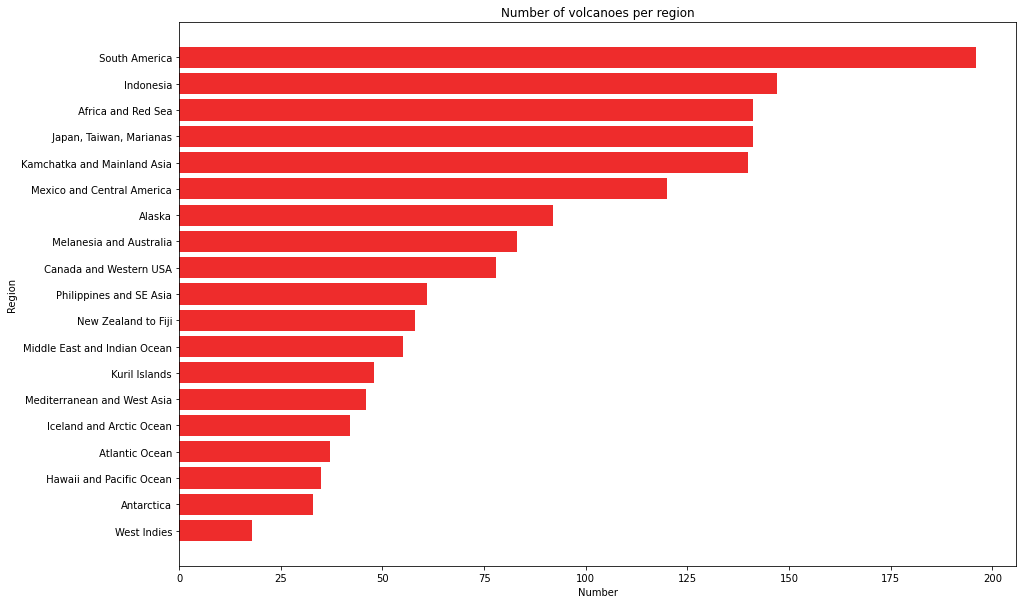

In [35]:
plt.figure(figsize=(15,10))
plt.title('Number of volcanoes per region')

plt.barh(df_reg['Region'], df_reg['Number'], color='#EE2C2C')
plt.xlabel('Number')
plt.ylabel('Region')
plt.show()

### Number of eruptions based on last known eruption category

In [36]:
df_erup = df.groupby(['Last Known Eruption'], as_index = False, sort=True).count().drop(columns=['Volcano Name', 'Country', 
        'Location', 'Latitude', 'Longitude', 'Elevation (m)', 'Type', 'Status', 'Region'])

df_erup = df_erup.drop(index= [0, 1, 9, 10, 12, 13])

df_erup

,Last Known Eruption,Number
2,D1,281
3,D2,156
4,D3,103
5,D4,35
6,D5,26
7,D6,75
8,D7,119
11,U,584
14,Unknown,159


Text(0, 0.5, 'Number')

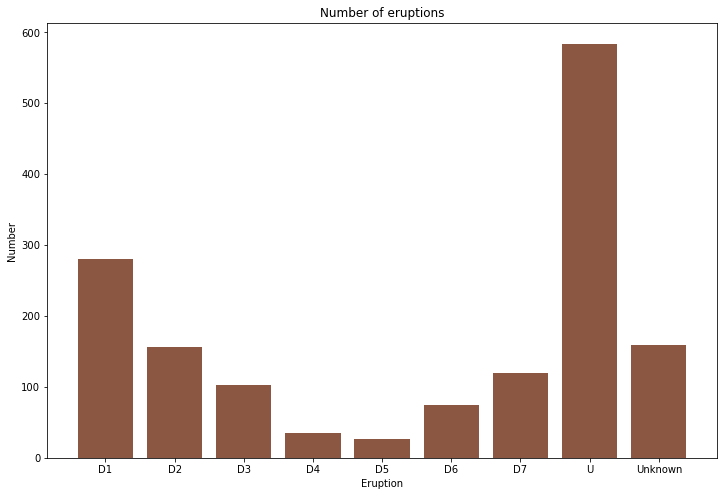

In [79]:
plt.figure(figsize=(12,8))
plt.title('Number of eruptions')
plt.bar(df_erup['Last Known Eruption'], df_erup['Number'], width = 0.8, color = '#8B5742')
plt.xlabel('Eruption')
plt.ylabel('Number')

##### Last known eruption:
- D1 = Last known eruption 1964 or later
- D2 = Last known eruption 1900-1963
- D3 = Last known eruption 1800-1899
- D4 = Last known eruption 1700-1799
- D5 = Last known eruption 1500-1699
- D6 = Last known eruption A.D. 1-1499
- D7 = Last known eruption B.C. (Holocene)
- Q = Quaternary eruption(s) with the only known Holocene activity being hydrothermal
- U = Undated, but probable Holocene eruption

### Distribution of Elevation

In [38]:
df_elev = df.dropna()

Text(0, 0.5, 'Count')

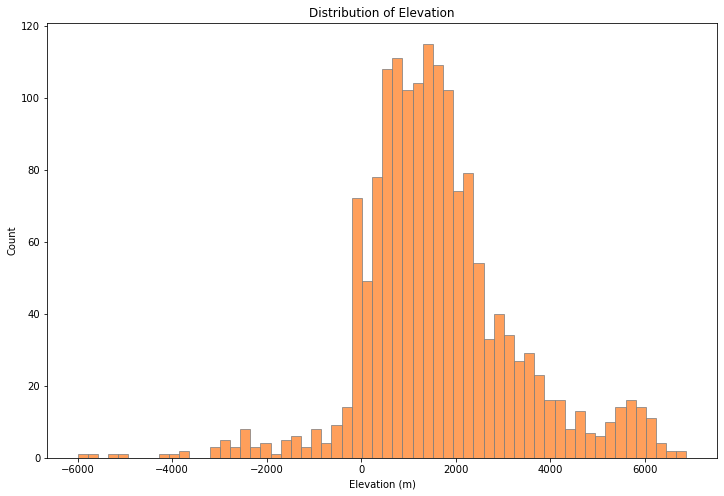

In [39]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Elevation')
plt.hist(df_elev['Elevation (m)'], bins=60, color='#FF7F24' , edgecolor='grey', alpha=0.75)
plt.xlabel('Elevation (m)')
plt.ylabel('Count')

Some volcanos are located under water level

### Visulizing volcanoes on a map

In [40]:
import folium
from folium import plugins
import ipywidgets
import branca
import branca.colormap as cm

In [41]:
map = folium.Map(zoom_start = 2)

lat = list(df['Latitude'])
lon = list(df['Longitude'])
volcano = list(df['Volcano Name'])

for loc, p in zip(zip(lat, lon), volcano):
    folium.Circle(
    location=loc,
    radius = 1000,
    fill = True,
    #color=colormap(p),
    #fill_opacity=0.2
    ).add_to(map)

map

#### Where are the Volcanoes that have had an eruption after 1964?

In [77]:
df_D1 = df[df['Last Known Eruption'] == 'D1'].drop(columns = ['Region', 'Number', 'Country', 'Location', 
                                                             'Elevation (m)', 'Status'])
df_rest = df[df['Last Known Eruption'] != 'D1'].drop(columns = ['Region', 'Number', 'Country', 'Location', 
                                                             'Elevation (m)', 'Status']) 

df_D1['Name and Type'] = df_D1[['Volcano Name', 'Type']].agg(', '.join, axis=1)
df_rest['Name and Type'] = df_rest[['Volcano Name', 'Type']].agg(', '.join, axis=1)

map_3 = folium.Map(zoom_start = 3)

for i in range(0,len(df_rest)):
    folium.Circle(
    location=[df_rest.iloc[i]['Latitude'], df_rest.iloc[i]['Longitude']],
    popup = df_rest.iloc[i]['Name and Type'],
    radius = 1000,
    fill = True,
    color='red',
    fill_opacity=0.2
    ).add_to(map_3)

for i in range(0,len(df_D1)):
    folium.Circle(
    location=[df_D1.iloc[i]['Latitude'], df_D1.iloc[i]['Longitude']],
    popup = df_D1.iloc[i]['Name and Type'],
    radius = 1000,
    fill = True,
    color='#3CB371',
    fill_opacity=0.2
    ).add_to(map_3)

map_3

Red dots shows volcanoes that have had an eruption after 1964